# The Spark Foundation(DSBA)

## TASK 2 : Predict the optimum number of clusters and repressent it visually

**Dataset: https://bit.ly/3kXTdox**

 **Name: Snehal Wadekar**

**Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import  figure
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

 **Reading dataset**

In [7]:
data=pd.read_csv('Iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
data.shape

(150, 6)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Checking Null Vales**

In [29]:
print(data.isnull().sum(),'\n \ no of duplication rows:',data.duplicated().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 
 \ no of duplication rows: 0


 **Droping duplicate rows**

In [15]:
data.drop_duplicates(inplace=True)

data.shape[0]

150

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


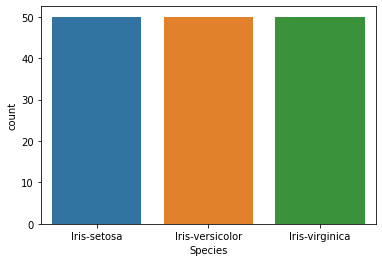

In [16]:
print(data.Species.value_counts())
sns.countplot(data.Species);

In [17]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**Heat map**

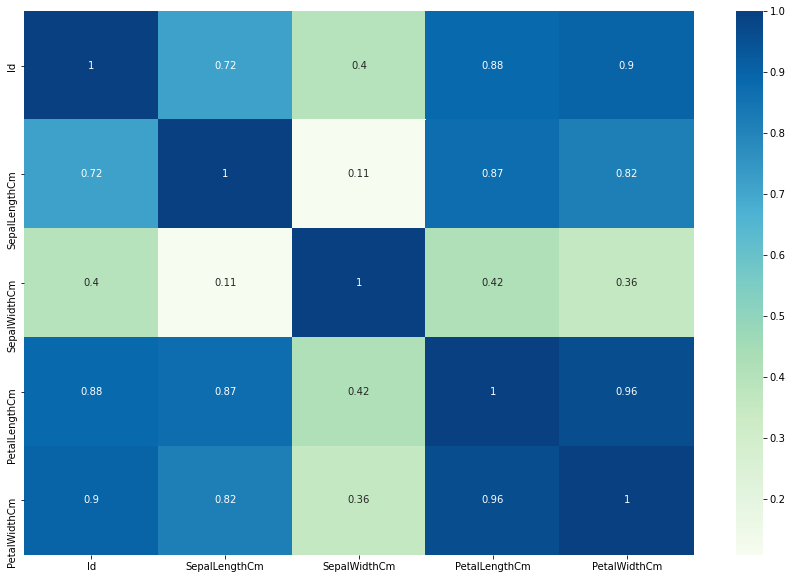

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(data.corr()), cmap= 'GnBu' ,annot=True);

## K-Means Clustering

 **Elbow Method**

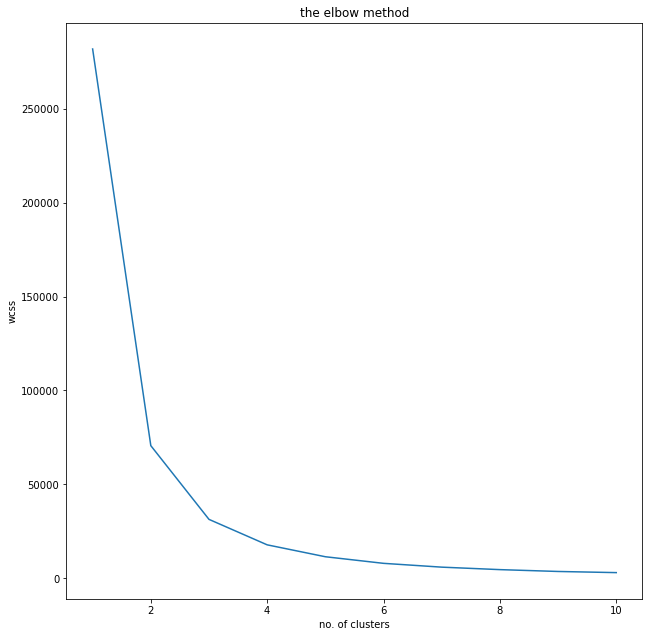

In [23]:
x=data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]  #within cluster sum of squares


for i in range(1, 11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++',
                 max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
fig=plt.figure(figsize=(20,20))
axes=fig.add_axes([0.4,0.4,0.4,0.4])
plt.plot(range(1, 11), wcss)
plt.title("the elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("wcss") 
plt.show()

## Predicted Cluster 

In [24]:
kmeans=KMeans(n_clusters = 3, init = 'k-means++',
                 max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

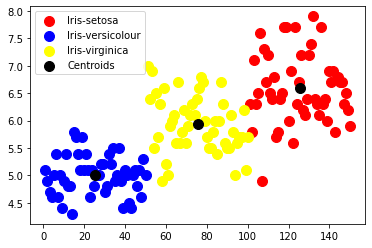

In [27]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1, 1],
            s = 100 ,c = 'blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_ [:,0],kmeans.cluster_centers_[:,1],
            s = 100, c= 'black', label = 'Centroids')

plt.legend()